## Statistical Testing

In order to test our hypothesis, we need to conduct statistical tests to determine whether our independent variable which is investor attention (name_price_attentino) has a statistically significant relationship with the target variable of returns (pct_return)

### Data Prepping 

Adding the dataframe we will be working with - which is the combined dataframe which includes financial information as well as the attention proxies


In [49]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [50]:
df = pd.read_csv("combined_financial_data.csv", index_col=0)
df.head()

,date,permno,ticker,price,volume,return,high,low,open,avg_price,mkt_cap,pct_return,ticker_attention,name_price_attention
0,2014-01-02,10107,MSFT,37.16,30423757.0,-0.006683,37.40,37.10,37.350,37.25,308428000.0,-0.6683,3.25,3.15
1,2014-01-03,10107,MSFT,36.91,30944370.0,-0.006728,37.22,36.60,37.200,36.91,306353000.0,-0.6728,3.38,1.54
2,2014-01-06,10107,MSFT,36.13,43111355.0,-0.021133,36.89,36.11,36.850,36.50,299879000.0,-2.1133,4.03,2.24
3,2014-01-07,10107,MSFT,36.41,35478667.0,0.007750,36.49,36.21,36.325,36.35,302203000.0,0.7750,4.94,1.19
4,2014-01-08,10107,MSFT,35.76,59452427.0,-0.017852,36.14,35.58,36.000,35.86,296808000.0,-1.7852,5.33,1.68


We see daily volatility is not in the dataset, therefore adding it using the formula
$$
\text{Daily Volatility} = \text{Daily Close} - \text{Daily Open}
$$

Daily volatility along wiht market cap and volume can behave as controls

In [51]:
df['daily_volatility'] = df['price'] - df['open']
df.head()

,date,permno,ticker,price,volume,return,high,low,open,avg_price,mkt_cap,pct_return,ticker_attention,name_price_attention,daily_volatility
0,2014-01-02,10107,MSFT,37.16,30423757.0,-0.006683,37.40,37.10,37.350,37.25,308428000.0,-0.6683,3.25,3.15,-0.190
1,2014-01-03,10107,MSFT,36.91,30944370.0,-0.006728,37.22,36.60,37.200,36.91,306353000.0,-0.6728,3.38,1.54,-0.290
2,2014-01-06,10107,MSFT,36.13,43111355.0,-0.021133,36.89,36.11,36.850,36.50,299879000.0,-2.1133,4.03,2.24,-0.720
3,2014-01-07,10107,MSFT,36.41,35478667.0,0.007750,36.49,36.21,36.325,36.35,302203000.0,0.7750,4.94,1.19,0.085
4,2014-01-08,10107,MSFT,35.76,59452427.0,-0.017852,36.14,35.58,36.000,35.86,296808000.0,-1.7852,5.33,1.68,-0.240


Creating X and y for statistical testing as well as to split for training and testing

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
fix_seed = 42

X = df[['name_price_attention']]
y = df['return']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=fix_seed)


### OLS Regression Analysis 

OLS regression helps to understand how one or more independent variables predict the outcome of a dependent variable, by minimizing the sum of the squared differences between the observed and predicted values.

We will run 8 models which will be various combinations of the 4 independent variables we are focusing on - attention, market cap, volume and volatility 

* model 1 - attention only 
* model 2 - attention plus mkt cap
* model 3 - attention plus volume
* model 4 - attention plus volatility
* model 5 - attention plus mkt cap and volume 
* model 6 - attention plus mkt cap and volatility
* model 7 - attention plus volatility and volume 
* model 8 - all 4 


add anomolies durign regression 
end - display the regresssion table/summary 

#### Model 1: Attention Only

In [54]:
# Adding a constant term to the model (intercept)
X = sm.add_constant(X) 

# Fit the OLS model
model = sm.OLS(y, X)
result = model.fit()

# Print the summary of the regression results
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                 return   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     9.507
Date:                Sun, 03 Mar 2024   Prob (F-statistic):            0.00205
Time:                        16:03:09   Log-Likelihood:             1.6768e+05
No. Observations:               64008   AIC:                        -3.354e+05
Df Residuals:                   64006   BIC:                        -3.353e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0004 

The OLS Analysis aims to explore the relationship between the independent variable name_price_attention and the target variable pct_return. While findings such as the R-square value show that the model is not a good fit, the p-value of less than 0.05 for the variable indicates a statistically significant association between our independent and dependent variable while keeping other values not included in the model constant. This suggests that, while minimal, there is a noticeable impact of changes in name_price_attention on the return.

Now adding controls and seeing how that impacts the p-value for our attention variable

#### Model 2: Attention and Market cap

Looking at controls such as volume, volatility and mkt_cap, let us see if that improves the model or impacts the p-value


In [55]:
#model 2: attention and market cap
# Adding a constant term to the model (intercept)
X2 = df[['name_price_attention', 'mkt_cap']]
X2 = sm.add_constant(X2) 

# Fit the OLS model
model2 = sm.OLS(y, X2)
m2_result = model2.fit()

# Print the summary of the regression results
print(m2_result.summary())


                            OLS Regression Results                            
Dep. Variable:                 return   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     6.666
Date:                Sun, 03 Mar 2024   Prob (F-statistic):            0.00127
Time:                        16:03:09   Log-Likelihood:             1.6768e+05
No. Observations:               64008   AIC:                        -3.354e+05
Df Residuals:                   64005   BIC:                        -3.353e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0003 

#### Model 3: Attention and Volume


In [56]:
#model 3: attention and volume
# Adding a constant term to the model (intercept)
X3 = df[['name_price_attention', 'volume']]
X3 = sm.add_constant(X3) 

# Fit the OLS model
model3 = sm.OLS(y, X3)
m3_result = model3.fit()

# Print the summary of the regression results
print(m3_result.summary())


                            OLS Regression Results                            
Dep. Variable:                 return   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     13.81
Date:                Sun, 03 Mar 2024   Prob (F-statistic):           1.00e-06
Time:                        16:03:09   Log-Likelihood:             1.6769e+05
No. Observations:               64008   AIC:                        -3.354e+05
Df Residuals:                   64005   BIC:                        -3.353e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0006 

#### Model 4: Attention and Daily Volatility


In [57]:
# Adding a constant term to the model (intercept)
X4 = df[['name_price_attention', 'daily_volatility']]
X4 = sm.add_constant(X4) 

# Fit the OLS model
model4 = sm.OLS(y, X4)
m4_result = model4.fit()

# Print the summary of the regression results
print(m4_result.summary())


                            OLS Regression Results                            
Dep. Variable:                 return   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                 1.233e+04
Date:                Sun, 03 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:03:09   Log-Likelihood:             1.7810e+05
No. Observations:               64008   AIC:                        -3.562e+05
Df Residuals:                   64005   BIC:                        -3.562e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0004 

#### Model 5: Attention, Market Cap and Volume


In [58]:
# Adding a constant term to the model (intercept)
X5 = df[['name_price_attention', 'mkt_cap', 'volume']]
X5 = sm.add_constant(X5) 

# Fit the OLS model
model5 = sm.OLS(y, X5)
m5_result = model5.fit()

# Print the summary of the regression results
print(m5_result.summary())


                            OLS Regression Results                            
Dep. Variable:                 return   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     18.45
Date:                Sun, 03 Mar 2024   Prob (F-statistic):           5.89e-12
Time:                        16:03:09   Log-Likelihood:             1.6770e+05
No. Observations:               64008   AIC:                        -3.354e+05
Df Residuals:                   64004   BIC:                        -3.354e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0004 

#### Model 6: Attention, Market Cap and Daily Volatility

In [59]:
# Adding a constant term to the model (intercept)
X6 = df[['name_price_attention', 'mkt_cap', 'daily_volatility']]
X6 = sm.add_constant(X6) 

# Fit the OLS model
model6 = sm.OLS(y, X6)
m6_result = model6.fit()

# Print the summary of the regression results
print(m6_result.summary())


                            OLS Regression Results                            
Dep. Variable:                 return   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     8219.
Date:                Sun, 03 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:03:09   Log-Likelihood:             1.7811e+05
No. Observations:               64008   AIC:                        -3.562e+05
Df Residuals:                   64004   BIC:                        -3.562e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0003 

#### Model 7: Attention and Daily Volatility


In [60]:
# Adding a constant term to the model (intercept)
X7 = df[['name_price_attention', 'daily_volatility', 'volume']]
X7 = sm.add_constant(X7) 

# Fit the OLS model
model7 = sm.OLS(y, X7)
m7_result = model5.fit()

# Print the summary of the regression results
print(m7_result.summary())


                            OLS Regression Results                            
Dep. Variable:                 return   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     18.45
Date:                Sun, 03 Mar 2024   Prob (F-statistic):           5.89e-12
Time:                        16:03:09   Log-Likelihood:             1.6770e+05
No. Observations:               64008   AIC:                        -3.354e+05
Df Residuals:                   64004   BIC:                        -3.354e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0004 

#### Model 8: Attention, Market Cap, Volume and Volatility


In [61]:
# Adding a constant term to the model (intercept)
X8 = df[['name_price_attention', 'mkt_cap','daily_volatility', 'volume']]
X8 = sm.add_constant(X8) 

# Fit the OLS model
model8 = sm.OLS(y, X8)
m8_result = model8.fit()

# Print the summary of the regression results
print(m8_result.summary())


                            OLS Regression Results                            
Dep. Variable:                 return   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     6177.
Date:                Sun, 03 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:03:09   Log-Likelihood:             1.7812e+05
No. Observations:               64008   AIC:                        -3.562e+05
Df Residuals:                   64003   BIC:                        -3.562e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0004 

### Regression

Based on the Pearson Correlation and some prior visualizations, we can determine that the data is non-linear therefore Linear Regression is not an option for our data. Therefore we use XXX regression that is found inbuilt in the statsmodels library in Python

About the regression model: XXX

In [62]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

In [63]:
#importing our df
df = pd.read_csv("combined_financial_data.csv", index_col=0)
df.head()

,date,permno,ticker,price,volume,return,high,low,open,avg_price,mkt_cap,pct_return,ticker_attention,name_price_attention
0,2014-01-02,10107,MSFT,37.16,30423757.0,-0.006683,37.40,37.10,37.350,37.25,308428000.0,-0.6683,3.25,3.15
1,2014-01-03,10107,MSFT,36.91,30944370.0,-0.006728,37.22,36.60,37.200,36.91,306353000.0,-0.6728,3.38,1.54
2,2014-01-06,10107,MSFT,36.13,43111355.0,-0.021133,36.89,36.11,36.850,36.50,299879000.0,-2.1133,4.03,2.24
3,2014-01-07,10107,MSFT,36.41,35478667.0,0.007750,36.49,36.21,36.325,36.35,302203000.0,0.7750,4.94,1.19
4,2014-01-08,10107,MSFT,35.76,59452427.0,-0.017852,36.14,35.58,36.000,35.86,296808000.0,-1.7852,5.33,1.68


In [64]:
df_test = pd.read_csv("quarterly_financial_data_2013_2023.csv")


#df_test = df_test.rename(columns = {'datedate': 'date'})
df_test['date'] = df_test['datadate']
df_test['ticker'] = df_test['tic']
df_test.head()

,gvkey,datadate,fqtr,tic,conm,net_income,revenue,total_assets,shareholders_equity,total_liabilities,total_debt,sales,operating_activities_cf,capital_expenditures,interest_expense,common_shares_outstanding,earnings_per_share,dividends_per_share,date,ticker
0,1690,2013-03-31,2,AAPL,APPLE INC,9547.0,43603.0,194743.0,135490.0,59253.0,0.0,43603.0,35930.0,4325.0,0.0,940.094,10.16,2.65,2013-03-31,AAPL
1,1690,2013-06-30,3,AAPL,APPLE INC,6900.0,35323.0,199856.0,123354.0,76502.0,16958.0,35323.0,43758.0,6210.0,53.0,908.442,7.51,3.05,2013-06-30,AAPL
2,1690,2013-09-30,4,AAPL,APPLE INC,7512.0,37472.0,207000.0,123549.0,83451.0,16960.0,37472.0,53666.0,8165.0,83.0,899.213,8.31,3.05,2013-09-30,AAPL
3,1690,2013-12-31,1,AAPL,APPLE INC,13072.0,57594.0,225184.0,129684.0,95500.0,16961.0,57594.0,22670.0,1985.0,84.0,892.447,14.59,3.05,2013-12-31,AAPL
4,1690,2014-03-31,2,AAPL,APPLE INC,10223.0,45646.0,205989.0,120179.0,85810.0,16962.0,45646.0,36208.0,3367.0,85.0,861.745,11.69,3.05,2014-03-31,AAPL


In [65]:
anomalies_df = pd.merge(df, df_test[['date','ticker','revenue', 'total_assets', 'earnings_per_share']], on=['date', 'ticker'], how = 'left')
anomalies_df['book_to_market'] = anomalies_df['total_assets'] / anomalies_df['mkt_cap']
anomalies_df['dt_date'] = pd.to_datetime(anomalies_df['date'])
anomalies_df['jan_dummy'] = (anomalies_df['dt_date'].dt.month == 1).astype(int)
anomalies_df['monday_dummy'] = (anomalies_df['dt_date'].dt.dayofweek == 0).astype(int)
anomalies_df['annual_rep_release'] = anomalies_df['book_to_market'].notna().astype(int)
anomalies_df[anomalies_df['book_to_market'].notna()].head()

,date,permno,ticker,price,volume,return,high,low,open,avg_price,...,ticker_attention,name_price_attention,revenue,total_assets,earnings_per_share,book_to_market,dt_date,jan_dummy,monday_dummy,annual_rep_release
60,2014-03-31,10107,MSFT,40.990,46886284.0,0.017122,41.5000,40.40,40.43,40.95000,...,8.16,2.87,20403.0,156119.0,0.68,0.000461,2014-03-31,0,1,1
123,2014-06-30,10107,MSFT,41.700,30805472.0,-0.013018,42.2100,41.70,42.17,41.95500,...,9.50,1.65,23000.0,172384.0,0.56,0.000502,2014-06-30,0,1,1
187,2014-09-30,10107,MSFT,46.360,33037774.0,-0.001723,46.4763,46.01,46.37,46.24315,...,9.46,4.32,23201.0,169656.0,0.55,0.000443,2014-09-30,0,0,1
251,2014-12-31,10107,MSFT,46.450,21552528.0,-0.012123,47.4400,46.45,46.73,46.94500,...,5.10,0.00,26470.0,174848.0,0.71,0.000458,2014-12-31,0,0,1
312,2015-03-31,10107,MSFT,40.655,34887219.0,-0.007446,41.0300,40.54,40.78,40.78500,...,10.67,1.62,21729.0,176683.0,0.61,0.000536,2015-03-31,0,0,1


### Trying OLS

In [66]:
import statsmodels.api as sm
df2 = df.copy()
# Assuming df, response_column, and training_columns are already defined
# Create the design matrix X
#df2['pct_return_2'] = df[df['pct_return']]
X = df2['name_price_attention']
X = sm.add_constant(X)  # Add a constant term to the model (intercept)

# Create the target variable y
y = df['pct_return']

# Fit the OLS model
model = sm.OLS(y, X)
result = model.fit()

# Print the summary of the regression results
print(result.summary())




                            OLS Regression Results                            
Dep. Variable:             pct_return   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     9.507
Date:                Sun, 03 Mar 2024   Prob (F-statistic):            0.00205
Time:                        16:03:10   Log-Likelihood:            -1.2709e+05
No. Observations:               64008   AIC:                         2.542e+05
Df Residuals:                   64006   BIC:                         2.542e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0418 

### Gradient Boost Regressor


TO DO: 
1. Clean this file 
2. For OLS model selection - add text
3. For gradient boost - add text 
4. For gradient boost - add lag and see impact? 
5. For gradient boost - add grid search 



In [67]:
#splitting the data
from sklearn.model_selection import train_test_split

fix_seed = 32
#X = df['name_price_attention']  # Extracting the feature
X = df[['name_price_attention', 'mkt_cap', 'volume']] #subject to change based on Robust regression
y = df['pct_return']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=fix_seed)

In [68]:
# GridSearch for hyperparameter tuning 


In [69]:
from sklearn.ensemble import GradientBoostingRegressor

params = {
    "n_estimators": 100,
    #"max_depth": 10,
    #"min_samples_split": 5,
    "learning_rate": 0.1,
    #"loss": "squared_error",
} #run a grid search maybe?

gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=fix_seed)
gb_regressor.fit(X_train, y_train)


GradientBoostingRegressor(random_state=32)

In [70]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error


y_pred = gb_regressor.predict(X_test)

# Evaluate the model
mse1 = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse1)

Mean Squared Error: 2.9414633054488637


In [71]:
feature_importances = gb_regressor.feature_importances_

# Get column names of your features
feature_names = X_train.columns

# Create a dictionary to map feature names to their importances
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sort the dictionary by importance values (optional)
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print or access the feature importances
for feature, importance in sorted_feature_importance:
    print(f"Feature: {feature}, Importance: {importance}")


Feature: mkt_cap, Importance: 0.4258798781165718
Feature: volume, Importance: 0.33321074771076586
Feature: name_price_attention, Importance: 0.24090937417266234


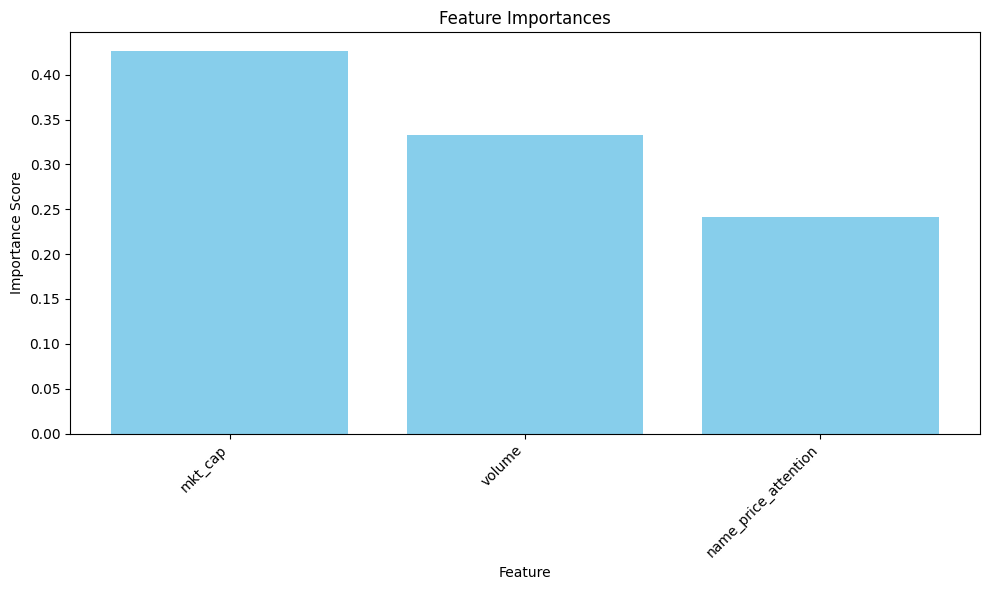

In [72]:
sorted_features = [x[0] for x in sorted_feature_importance]
sorted_importances = [x[1] for x in sorted_feature_importance]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_features)), sorted_importances, color="skyblue", align="center")
plt.xticks(range(len(sorted_features)), sorted_features, rotation=45, ha='right')
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.title("Feature Importances")
plt.tight_layout()
plt.show()



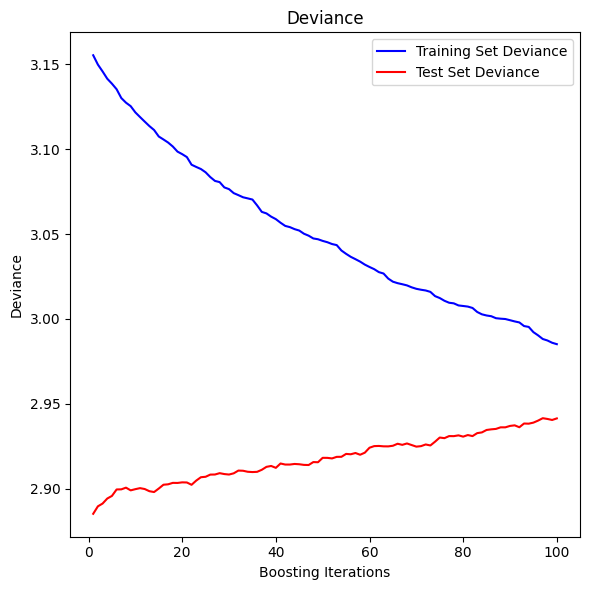

In [73]:
# Visualization 

test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(gb_regressor.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    gb_regressor.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()


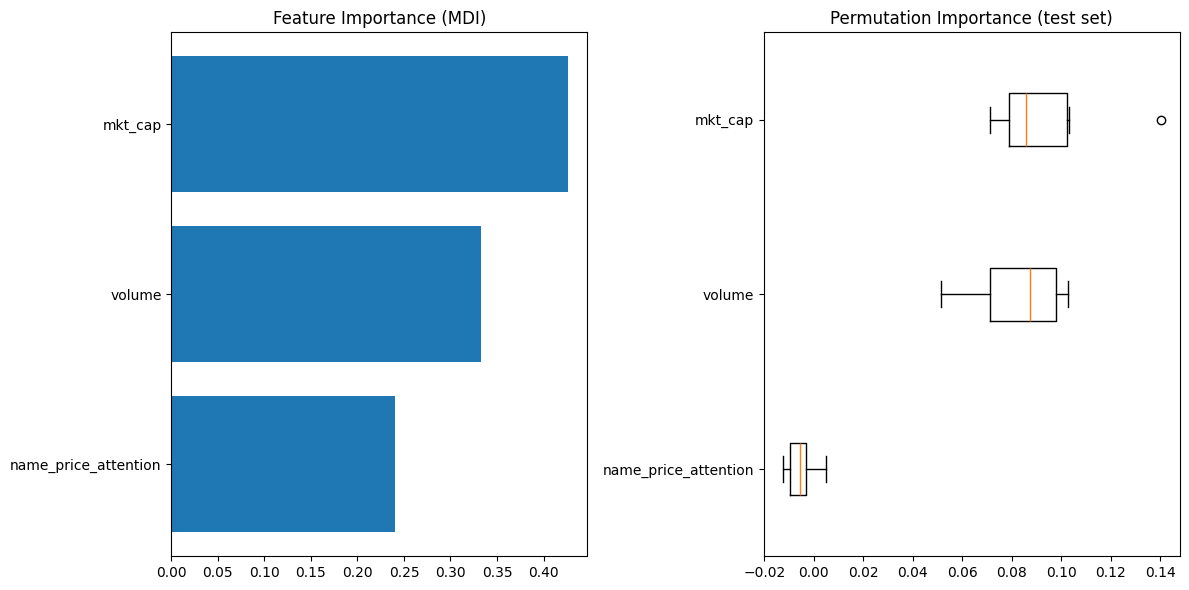

In [74]:
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


feature_importance = gb_regressor.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    gb_regressor, X_test, y_test, n_repeats=10, random_state=fix_seed, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(X.columns)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()


### GRADIENT boost regression with LAG

In [75]:
df_lag = df.copy()

df_lag['Lag_attention'] = df_lag['name_price_attention'].shift(1)
df_lag.dropna(inplace=True) #removing the last value 

df_lag.shape

(64007, 15)

In [76]:
#splitting the data
from sklearn.model_selection import train_test_split

fix_seed = 32
#X = df['name_price_attention']  # Extracting the feature
X2 = df_lag[['Lag_attention', 'mkt_cap', 'volume']] #subject to change based on Robust regression
y2 = df_lag['pct_return']


X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=fix_seed)

In [77]:
gb_lag = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=fix_seed)
gb_lag.fit(X2_train, y2_train)

GradientBoostingRegressor(random_state=32)

In [78]:
from sklearn.model_selection import cross_val_score

y2_pred = gb_lag.predict(X2_test)

# Evaluate the model
mse2 = mean_squared_error(y2_test, y2_pred)
print("Mean Squared Error:", mse2)

Mean Squared Error: 2.9204964353910716


In [79]:
feature_importances2 = gb_lag.feature_importances_

# Get column names of your features
feature_names2 = X2_train.columns

# Create a dictionary to map feature names to their importances
feature_importance_dict2 = dict(zip(feature_names2, feature_importances2))

# Sort the dictionary by importance values (optional)
sorted_feature_importance2 = sorted(feature_importance_dict2.items(), key=lambda x: x[1], reverse=True)

# Print or access the feature importances
for feature, importance in sorted_feature_importance2:
    print(f"Feature: {feature}, Importance: {importance}")


Feature: volume, Importance: 0.37466767823893926
Feature: mkt_cap, Importance: 0.31516737451187693
Feature: Lag_attention, Importance: 0.3101649472491838


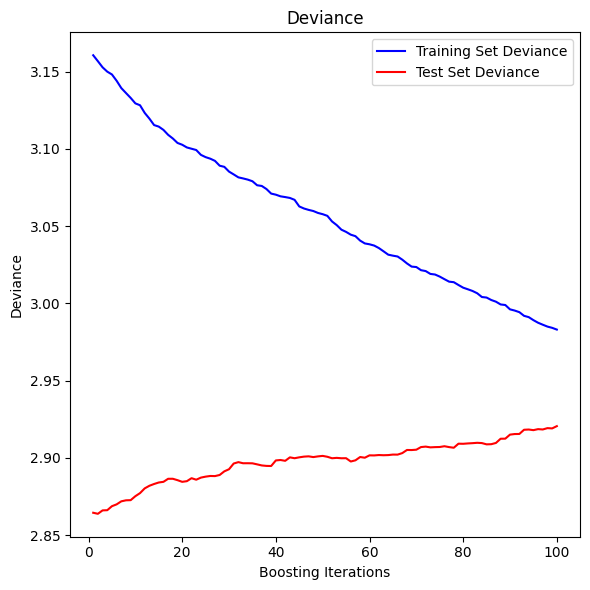

In [80]:
# Visualization 

test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y2_pred in enumerate(gb_lag.staged_predict(X2_test)):
    test_score[i] = mean_squared_error(y2_test, y2_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    gb_lag.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()


In [81]:
#Comparing both models
print("Model 1 (no lag) MSE:", mse1)
print("Model 2 (lag) MSE:", mse2)


Model 1 (no lag) MSE: 2.9414633054488637
Model 2 (lag) MSE: 2.9204964353910716
